<a href="https://colab.research.google.com/github/Polar-Tsai/Lesson_Record/blob/main/CNN_%E4%BA%A4%E9%80%9A%E5%B7%A5%E5%85%B7(cifar10)_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 摘要
利用cifar10進行以下處理
1. 訓練模型 - 卷積網路(CNN)
2. 測試模型

In [ ]:
# 讀取資料
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
trans = [
  "airplane",										
  "automobile",										
  "bird",										
  "cat",										
  "deer",										
  "dog",										
  "frog",										
  "horse",										
  "ship",										
  "truck"
]

truck


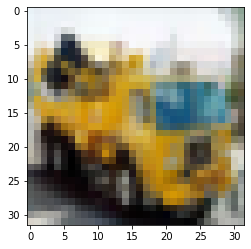

In [ ]:
# pop up the image randomly
import random
import matplotlib.pyplot as plt

idx = random.randint(0,49999)
print(trans[y_train[idx][0]])
plt.imshow(x_train[idx])

In [ ]:
# build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D # 卷積、池化
from tensorflow.keras.layers import Dense, Dropout, Flatten # 輸出層/隱藏層、拋棄、平坦層

layers = [
    Conv2D(64, 3, padding="same", activation = "relu", input_shape=(32,32,3)), # 建立第一層卷積層: 過濾器64個，過濾器大小為3，圖片大小同源圖
    MaxPooling2D(), # 第一層池化
    Conv2D(128, 3, padding="same", activation = "relu"), # 第二層卷積
    MaxPooling2D(), # 第二層池化
    Conv2D(256, 3, padding="same", activation = "relu"), # 第三層卷積
    MaxPooling2D(), # 第三層池化
    Conv2D(512, 3, padding="same", activation = "relu"), # 第四層卷積
    MaxPooling2D(), # 第四層池化
    Flatten(), # 平坦層:將特徵輸入至神經網路中
    Dense(128, activation = "relu"), # 
    Dropout(0.25), # 拋棄25%以避免過擬合
    Dense(10, activation="softmax") # 輸出層
]

model = Sequential(layers)
model.summary()

# 卷積層1(conv2D): (3長*3寬*3通道+1bias)*64(filter)=1792
# 全連接層(Dense): 2048*128+128(bias)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 512)         1

In [ ]:
# train the model

from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

In [ ]:
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
  EarlyStopping(patience=5, restore_best_weights=True),
  ModelCheckpoint("cnn.h5", save_best_only=True)
]

model.fit(x_train_norm,
     y_train,
     batch_size=200, # 每批讀取200筆資料
     epochs=50, # 訓練50次
     validation_split=0.1, # 驗證資料取10%
     verbose=2, # 簡易顯示訓練過程
     callbacks=callbacks)

Epoch 1/50
225/225 - 38s - loss: 1.7373 - accuracy: 0.3557 - val_loss: 1.3344 - val_accuracy: 0.5102
Epoch 2/50
225/225 - 4s - loss: 1.2434 - accuracy: 0.5533 - val_loss: 1.0375 - val_accuracy: 0.6278
Epoch 3/50
225/225 - 4s - loss: 1.0085 - accuracy: 0.6431 - val_loss: 0.9159 - val_accuracy: 0.6778
Epoch 4/50
225/225 - 4s - loss: 0.8412 - accuracy: 0.7064 - val_loss: 0.7946 - val_accuracy: 0.7216
Epoch 5/50
225/225 - 4s - loss: 0.7126 - accuracy: 0.7530 - val_loss: 0.7630 - val_accuracy: 0.7372
Epoch 6/50
225/225 - 4s - loss: 0.6020 - accuracy: 0.7928 - val_loss: 0.6768 - val_accuracy: 0.7616
Epoch 7/50
225/225 - 4s - loss: 0.5086 - accuracy: 0.8219 - val_loss: 0.6711 - val_accuracy: 0.7678
Epoch 8/50
225/225 - 4s - loss: 0.4258 - accuracy: 0.8529 - val_loss: 0.7050 - val_accuracy: 0.7776
Epoch 9/50
225/225 - 4s - loss: 0.3496 - accuracy: 0.8789 - val_loss: 0.7244 - val_accuracy: 0.7746
Epoch 10/50
225/225 - 4s - loss: 0.2700 - accuracy: 0.9061 - val_loss: 0.7425 - val_accuracy: 0.780

In [ ]:
# 印出準確率
model.evaluate(x_test_norm, y_test)


313/313 [==============================] - 2s 4ms/step - loss: 0.7176 - accuracy: 0.7596


[0.7176283001899719, 0.7595999836921692]

In [ ]:
# save the model
model.save("cnn1.h5")

In [ ]:
# start to test

pre = model.predict_classes(x_test_norm)
pre

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([3, 1, 8, ..., 5, 4, 7])

In [ ]:
y_test_r = y_test.reshape(-1)
y_test_r.shape

(10000,)

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test_r, pre)
pd.DataFrame(mat,
      columns = [trans[i]+"(預測)" for i in range(10)],
      index=[trans[i]+"(正確)" for i in range(10)])

,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(正確),816,19,49,20,11,10,7,7,36,25
automobile(正確),7,924,1,7,1,3,1,3,10,43
bird(正確),50,8,675,72,61,84,26,16,3,5
cat(正確),16,13,55,605,43,200,27,21,4,16
deer(正確),11,4,75,60,713,59,26,46,5,1
dog(正確),9,7,35,159,25,715,9,30,4,7
frog(正確),5,7,46,94,36,40,753,4,7,8
horse(正確),22,2,34,42,34,78,1,771,1,15
ship(正確),73,57,9,15,6,7,2,2,807,22
truck(正確),25,104,10,11,1,7,2,7,16,817


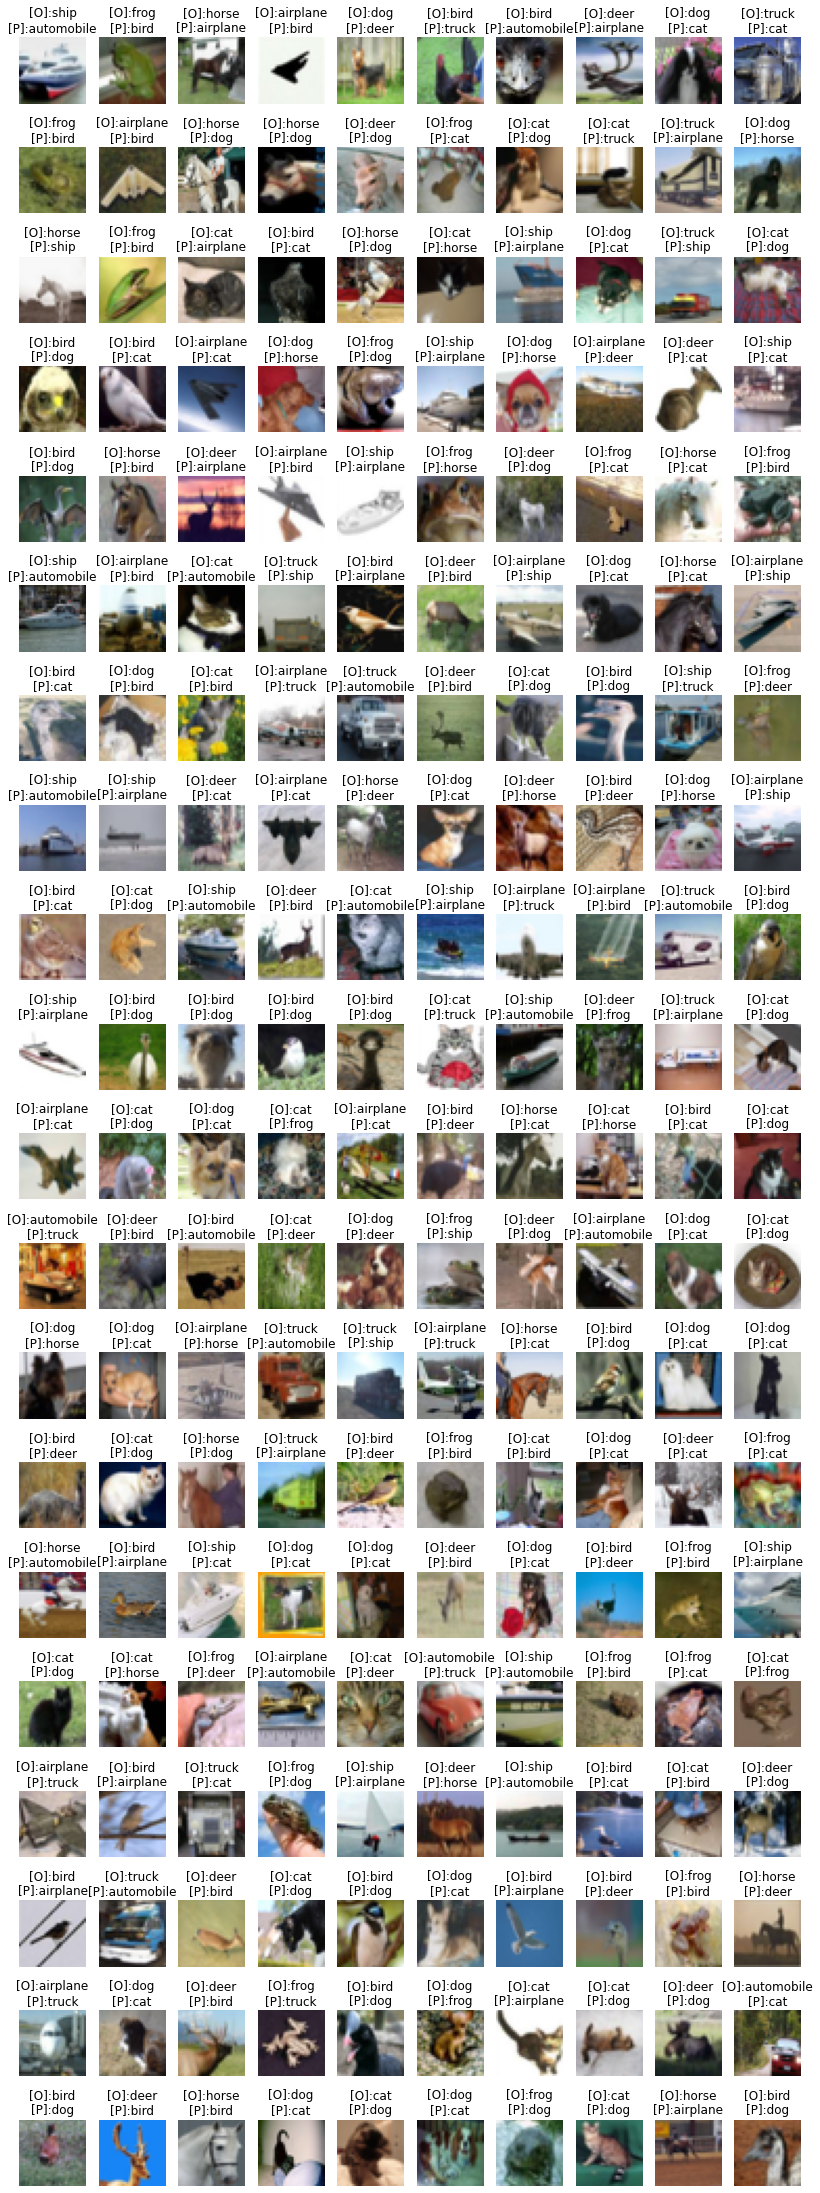

In [ ]:
# 查看訓練後模型在測試後的準確狀況

import numpy as np

idx = np.nonzero(pre != y_test_r)[0][:200]
false_img = x_test[idx]
false_pre = pre[idx]
false_label = y_test_r[idx]
plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[O]:{}\n[P]:{}".format(trans[false_label[i]], trans[false_pre[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(false_img[i])

url:https://s.rfi.fr/media/display/52a42fbc-2174-11ea-8cdd-005056a98db9/w:1280/p:16x9/sdh.webp


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


airplane 的機率: 0.008237982
automobile 的機率: 0.0047287284
bird 的機率: 0.0011294675
cat 的機率: 0.001449647
deer 的機率: 0.0028472256
dog 的機率: 0.00013039482
frog 的機率: 0.0043223933
horse 的機率: 2.8771687e-05
ship 的機率: 0.9743312
truck 的機率: 0.00279421
答案: ship


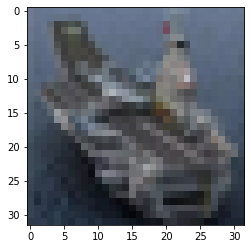

In [ ]:
# 隨機抓圖進行測試
import requests
from PIL import Image
# RGB, RGBA, L(gray)
url = input("url:")
headers = {
  "user-agent":"user-agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36"  
}
response = requests.get(url, headers=headers, stream=True, verify=False)
img = Image.open(response.raw).resize((32, 32)).convert("RGB")
img_np = np.array(img)
img_np_r = img_np.reshape(1, 32, 32, 3) / 255.0
proba = model.predict(img_np_r)[0]
for i in range(10):
    print(trans[i], "的機率:", proba[i])
ans = model.predict_classes(img_np_r)[0]
print("答案:", trans[ans])
plt.imshow(img_np)